In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("Iris.csv")
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [50]:
df.shape

(150, 6)

In [51]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [52]:
df.drop(columns=['Id'],axis=1,inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [53]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
df.drop('Species',axis=1,inplace=True)

In [12]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
ss = StandardScaler()
a = ss.fit_transform(df)
df_sc = pd.DataFrame(a,columns=df.columns)
df_sc

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [13]:
from sklearn.cluster import KMeans

In [26]:
l = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i)
    kmean.fit(df_sc)
    l.append(kmean.inertia_)

In [27]:
l

[600.0,
 223.73200573676345,
 140.96581663074699,
 114.38954350297054,
 91.06677122728537,
 80.22863869110714,
 71.96703015033712,
 62.641008351188034,
 55.151499880261596,
 47.35278828161101]

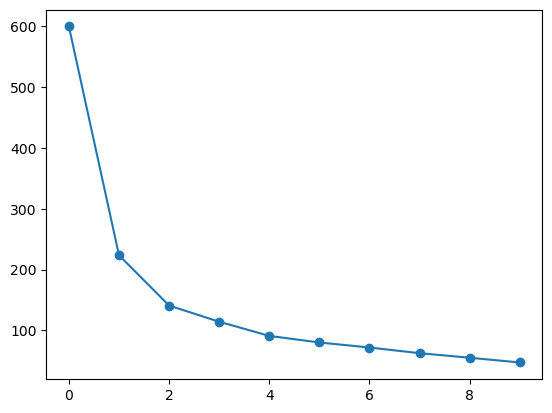

In [28]:
plt.plot(l,marker='o')

In [29]:
from sklearn.metrics import silhouette_score

In [33]:
a = []
for i in range(2,11):
    kmean = KMeans(n_clusters=i).fit(df_sc)
    sil_score = silhouette_score(df_sc,kmean.labels_)
    print("Silhoutte score for",i,'is',sil_score)
    a.append(sil_score)

Silhoutte score for 2 is 0.580184463257396
Silhoutte score for 3 is 0.45840087099074767
Silhoutte score for 4 is 0.3887799827106933
Silhoutte score for 5 is 0.34767483142797456
Silhoutte score for 6 is 0.3366269518157899
Silhoutte score for 7 is 0.33858794330972436
Silhoutte score for 8 is 0.3391132780277428
Silhoutte score for 9 is 0.33810786645200946
Silhoutte score for 10 is 0.3482531264310713


In [42]:
kmean = KMeans(n_clusters=3)
km = kmean.fit(df_sc)

In [43]:
y_km = km.fit_predict(df_sc)

In [44]:
y_km

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [45]:
df_sc['Labels'] = y_km

In [46]:
df_sc

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Labels
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,2
146,0.553333,-1.281972,0.705893,0.922064,1
147,0.795669,-0.124958,0.819624,1.053537,2
148,0.432165,0.800654,0.933356,1.447956,2


<AxesSubplot: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

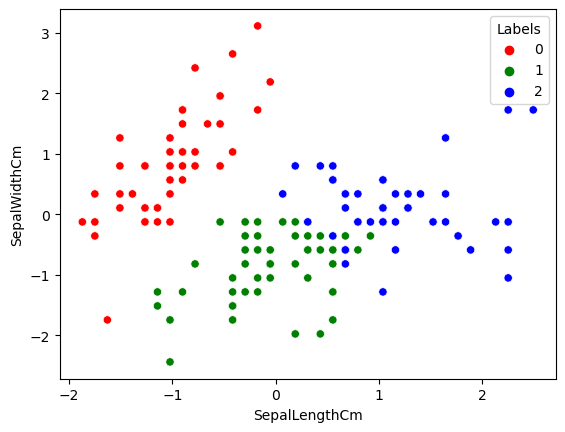

In [48]:
sns.scatterplot(x=df_sc['SepalLengthCm'],y=df_sc['SepalWidthCm'],hue=df_sc['Labels'],palette=['red','green','blue','orange'])